In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import sklearn


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, LSTM, Input,SpatialDropout1D, GlobalMaxPool1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, precision_score, accuracy_score, recall_score, f1_score
from tensorflow.keras.optimizers import Adam

In [5]:
# 5. Membaca file CSV ke dalam DataFrame
import pandas as pd
df = pd.read_csv('dataset_50k.csv')
df.head()

Unnamed: 0  Label                                         detokenize
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...
1           1      0   buang pikir negatif laku gelisah milik putus asa
2           2      1  jujur aku takut mati aku orang aku sulit paham...
3           3      0              saya mes pasang sepatu jam saya harap
4           4      1  capek hati banget aku allah aku kayak mata ora...

In [6]:
df = df.dropna()
df

Unnamed: 0  Label                                         detokenize
0               0      1  aku luka diri aku jalan hidup sulit orang tua ...
1               1      0   buang pikir negatif laku gelisah milik putus asa
2               2      1  jujur aku takut mati aku orang aku sulit paham...
3               3      0              saya mes pasang sepatu jam saya harap
4               4      1  capek hati banget aku allah aku kayak mata ora...
...           ...    ...                                                ...
50518       50518      0  curi rampok liar begal rakyat senantiasa resah...
50519       50519      0                      saya bicara saya buat tertawa
50520       50520      1  sakit sakit guna sakit bahagia sakit bohong or...
50521       50521      1                              lantai lantai gelisah
50522       50522      1  aku tulis catat kemarin kata tunang aku laku b...

[50523 rows x 3 columns]

In [7]:
df['label'] = df['Label'].apply(lambda x: 0 if x == 0 else 1)
df.head()

Unnamed: 0  Label                                         detokenize  label
0           0      1  aku luka diri aku jalan hidup sulit orang tua ...      1
1           1      0   buang pikir negatif laku gelisah milik putus asa      0
2           2      1  jujur aku takut mati aku orang aku sulit paham...      1
3           3      0              saya mes pasang sepatu jam saya harap      0
4           4      1  capek hati banget aku allah aku kayak mata ora...      1

<BarContainer object of 2 artists>

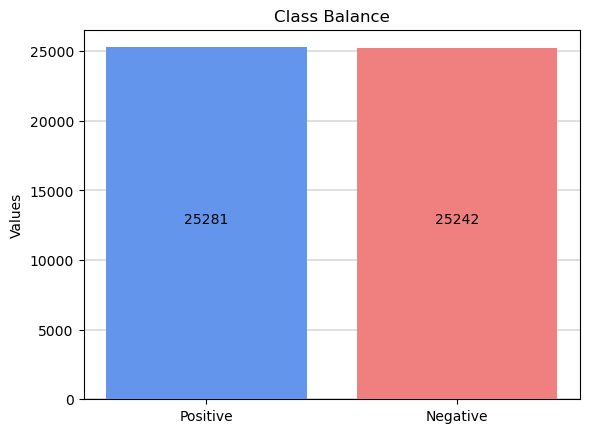

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',zorder=4)

# Count the values in the 'Label' column
count = df['Label'].value_counts()
x = ["Positive", "Negative"]  # Custom labels for class balance plot
y = [count[1], count[0]]
addlabels(x,y)
plt.ylabel("Values")
plt.title('Class Balance')
plt.grid(color='dimgray', linewidth=0.3, axis='y',zorder=0)
plt.bar(x,y, color= ['cornflowerblue', 'lightcoral'], zorder=3)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vektorisasi teks menggunakan TF-IDF unigram+bigram(1,2)
vectorizer = TfidfVectorizer(min_df=10, ngram_range=(1,2), max_df=0.7, max_features=10000)

# Menggunakan fit_transform untuk mengubah dokumen menjadi fitur
vector = vectorizer.fit_transform(df['detokenize']).toarray()
tf_idf_len = len(vectorizer.vocabulary_)

In [10]:
#Split data 90% data train and 10% data test
x_unibigram = pd.DataFrame(vector)
label = df["Label"]
x_train, x_test, y_train, y_test =  model_selection.train_test_split(x_unibigram, label, test_size = 0.1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(45470, 10000) (45470,)
(5053, 10000) (5053,)


In [11]:
y_train

36692    1
46012    0
11112    0
31233    0
42870    1
        ..
30635    1
3422     1
43514    1
39978    0
46218    0
Name: Label, Length: 45470, dtype: int64

In [12]:
x_train

0     1     2     3     4     5     6     7     8     9     ...  9990  \
36692   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
46012   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11112   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
31233   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
42870   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...     ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
30635   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3422    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
43514   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
39978   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
46218   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

       9991  9992  9993  9994  9995  9996  9997  9998  9999  
36692   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
46012   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
11112   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
31233   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
42870   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
30635   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3422    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
43514   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
39978   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
46218   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[45470 rows x 10000 columns]

In [13]:
x_train = np.array(x_train).reshape(-1, 1, x_train.shape[1])
x_test = np.array(x_test).reshape(-1, 1, x_test.shape[1])

In [14]:
x_train.shape

(45470, 1, 10000)

In [15]:
import matplotlib.pyplot as plt

def make_plot(history, train, validation, title):
    graph = plt.plot(history.history[train], lw=2.0)
    graph = plt.plot(history.history[validation], lw=2.0)
    graph = plt.title(title)
    graph = plt.legend(['training', 'validasi'])
    graph = plt.show()

    return graph

In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Membuat model lstm
def lstm(x_train, y_train, x_test, y_test):


    model = Sequential()
    model.add(Input(shape=(1,x_train.shape[2])))
    model.add(SpatialDropout1D(0.25))
    model.add(LSTM(128, recurrent_dropout=0.2))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer=optimizer ,metrics=['accuracy'])
    print(model.summary())

    history = model.fit(x_train, y_train, epochs = 10, validation_data=(x_test, y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)] )

    #Membuat plot garis akurasi
    make_plot(history, "accuracy", "val_accuracy", "Perubahan Akurasi tiap epoch")

    #predict
    predictions = model.predict(x_test)
    print()
    print("Classification Report :")
    print(classification_report(y_test, predictions.round(), digits=6))


    acc_score = accuracy_score(y_test, predictions.round())
    prec_score = precision_score(y_test, predictions.round())
    rec_score = recall_score(y_test, predictions.round())
    f1score = f1_score(y_test, predictions.round())

    return [acc_score,prec_score,rec_score,f1score ]


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d (SpatialD  (None, 1, 10000)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               5186048   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5,190,209
Trainable params: 5,190,209
Non-trainable params: 0
______________________________________________

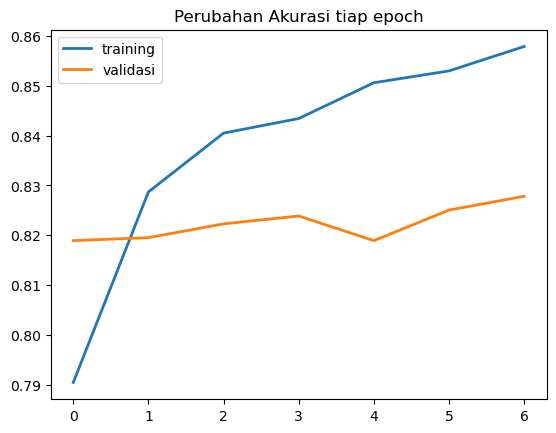

158/158 [==============================] - 4s 22ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.841891  0.810832  0.826070      2548
           1   0.814544  0.845110  0.829545      2505

    accuracy                       0.827825      5053
   macro avg   0.828217  0.827971  0.827808      5053
weighted avg   0.828334  0.827825  0.827793      5053

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d_1 (Spatia  (None, 1, 10000)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 128)               5186048   
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                          

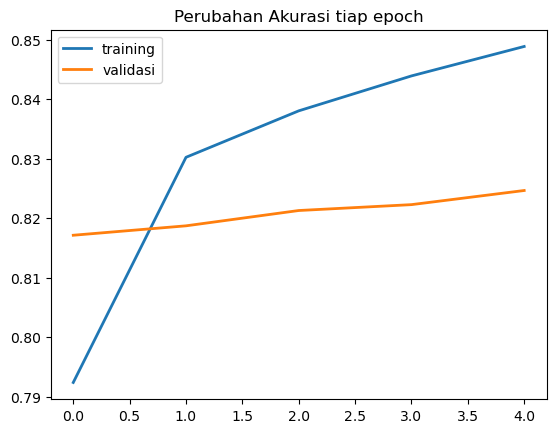

158/158 [==============================] - 3s 15ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.841413  0.803768  0.822160      2548
           1   0.809087  0.845908  0.827088      2505

    accuracy                       0.824659      5053
   macro avg   0.825250  0.824838  0.824624      5053
weighted avg   0.825388  0.824659  0.824603      5053

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spatial_dropout1d_2 (Spatia  (None, 1, 10000)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 128)               5186048   
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                          

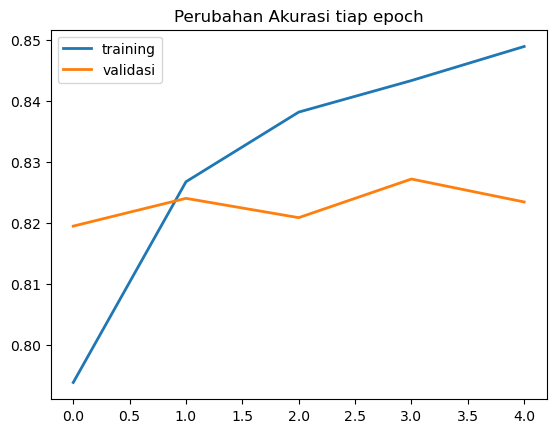

158/158 [==============================] - 4s 20ms/step

Classification Report :
              precision    recall  f1-score   support

           0   0.859687  0.776688  0.816082      2548
           1   0.793166  0.871058  0.830289      2505

    accuracy                       0.823471      5053
   macro avg   0.826427  0.823873  0.823186      5053
weighted avg   0.826710  0.823471  0.823125      5053



In [17]:
result = []
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))
result.append(lstm(x_train, y_train, x_test, y_test))

In [18]:
average = np.mean(result, axis=0, dtype=float)
print('Average Accuracy  :', average[0])
print('Average Precision :', average[1])
print('Average Recall    :', average[2])
print('Average F1-Score  :', average[3])

Average Accuracy  : 0.825318292763375
Average Precision : 0.8055992049232463
Average Recall    : 0.8540252827677978
Average F1-Score  : 0.8289742867274869
